In [1]:
# import modules
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
import keras
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

In [2]:
# read in training value
train_set = pd.read_csv('./train_values.csv', index_col=0)
train_set.iloc[0]

geo_level_1_id                                6
geo_level_2_id                              487
geo_level_3_id                            12198
count_floors_pre_eq                           2
age                                          30
area_percentage                               6
height_percentage                             5
land_surface_condition                        t
foundation_type                               r
roof_type                                     n
ground_floor_type                             f
other_floor_type                              q
position                                      t
plan_configuration                            d
has_superstructure_adobe_mud                  1
has_superstructure_mud_mortar_stone           1
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber               

In [3]:
# read training label
train_label = pd.read_csv('./train_labels.csv', index_col=0)

In [14]:
train_set['foundation_type'].unique()

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [68]:
train_set.shape

(260601, 38)

In [4]:
len(train_set['geo_level_1_id'].unique())

31

In [13]:
train_set.groupby('geo_level_1_id')['geo_level_2_id'].nunique()

geo_level_1_id
0     57
1     47
2     54
3      6
4     55
5     62
6     90
7     67
8     62
9     16
10    50
11    26
12    73
13    56
14    76
15    56
16    31
17    79
18    18
19    36
20    54
21    52
22    42
23    30
24    26
25    40
26    44
27    11
28    29
29    35
30    34
Name: geo_level_2_id, dtype: int64

In [5]:
train_set.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

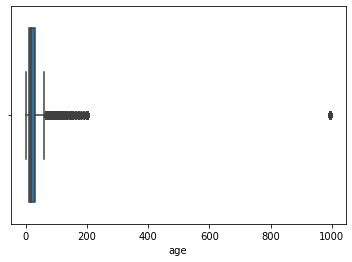

In [69]:
sns.boxplot(train_set['age'])

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [72]:
train_set['position'].unique()

array(['t', 's', 'j', 'o'], dtype=object)

<AxesSubplot:>

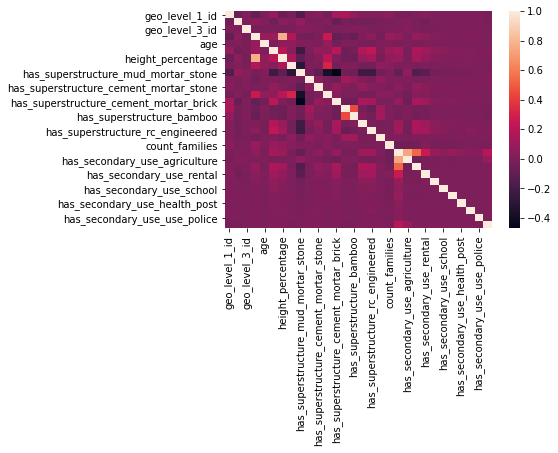

In [7]:
sns.heatmap(train_set.corr())

In [21]:
train_set[train_set['geo_level_1_id']==27]['geo_level_2_id'].unique()

array([ 216,  548,  390,  422, 1394, 1106, 1155,  533,  181, 1000,  269],
      dtype=int64)

In [4]:
dummy = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
dummy_col = pd.get_dummies(train_set[dummy])
train_set_combined = pd.concat([train_set, dummy_col],axis=1)
train_set_combined.drop(dummy, axis=1, inplace=True)

In [5]:
scaler = StandardScaler()
train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']] = scaler.fit_transform(train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']])

In [10]:
train_set_combined.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# Split the test and train dataset
X_train, X_test, y_train, y_test = train_test_split(train_set_combined, train_label, test_size=0.2, random_state=42)

In [13]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, lin_pred)

0.30370591785254486

In [20]:
# use 2.5 threshold for classification
lin_reg_class = []
for num in lin_pred:
    if num >=2.5:
        lin_reg_class.append(3)
    elif num >=1.5 and num <2.5:
        lin_reg_class.append(2)
    elif num <1.5:
        lin_reg_class.append(1)

In [22]:
accuracy_score(lin_reg_class, y_test)

0.5746436177356535

In [24]:
# use 2.3 threshold for classification
lin_reg_class = []
for num in lin_pred:
    if num >=2.3:
        lin_reg_class.append(3)
    elif num >=1.3 and num <2.3:
        lin_reg_class.append(2)
    elif num <1.3:
        lin_reg_class.append(1)
accuracy_score(lin_reg_class, y_test)

0.5086049768807198

In [30]:
# GridSearch - Logistic Regression
log_param = {
    'multi_class': ['multinomial'],
    'solver': ['lbfgs', 'liblinear', 'sag']
}

log_clf= GridSearchCV(LogisticRegression(), log_param)
log_clf.fit(X_train, y_train)
log_pred = log_clf.predict(X_test)
accuracy_score(y_test, log_pred)

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did n

0.5881122772011281

In [25]:
# GridSearch - KNN
knn_param = {
    'n_neighbors': [5, 20, 50, 100, 200],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_clf = GridSearchCV(KNeighborsClassifier(), knn_param, cv=10)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
accuracy_score(knn_pred, y_test)

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

0.6893574566873237

In [26]:
knn_clf.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

In [29]:
# Neural Network
NN_clf = keras.Sequential([keras.layers.Flatten(),
                keras.layers.Dense(64,activation = tf.nn.sigmoid),
                keras.layers.Dense(64,activation = tf.nn.relu),
                keras.layers.Dense(4,activation = tf.nn.softmax)])
NN_clf.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

NN_clf.fit(X_train, y_train,epochs = 10)

Epoch 1/10
6515/6515 [==============================] - 6s 746us/step - loss: 0.8055 - accuracy: 0.5922
Epoch 2/10
6515/6515 [==============================] - 5s 709us/step - loss: 0.7635 - accuracy: 0.6202
Epoch 3/10
6515/6515 [==============================] - 5s 718us/step - loss: 0.7535 - accuracy: 0.6267
Epoch 4/10
6515/6515 [==============================] - 5s 756us/step - loss: 0.7407 - accuracy: 0.6418
Epoch 5/10
6515/6515 [==============================] - 5s 709us/step - loss: 0.7238 - accuracy: 0.6544
Epoch 6/10
6515/6515 [==============================] - 5s 724us/step - loss: 0.7167 - accuracy: 0.6594
Epoch 7/10
6515/6515 [==============================] - 6s 855us/step - loss: 0.7100 - accuracy: 0.6646
Epoch 8/10
6515/6515 [==============================] - 5s 828us/step - loss: 0.7066 - accuracy: 0.6660
Epoch 9/10
6515/6515 [==============================] - 5s 706us/step - loss: 0.7020 - accuracy: 0.6686
Epoch 10/10
6515/6515 [==============================] - 5s 699u

In [48]:
# Neural Network
NN_clf_1 = keras.Sequential([keras.layers.Flatten(),
                keras.layers.Dense(64,activation = tf.nn.sigmoid),
                keras.layers.Dense(64,activation = tf.nn.relu),
                keras.layers.Dense(32,activation = tf.nn.tanh),
                keras.layers.Dense(32,activation = tf.nn.relu),
                keras.layers.Dense(16,activation = tf.nn.sigmoid),
                keras.layers.Dense(16,activation = tf.nn.relu),
                keras.layers.Dense(3,activation = tf.nn.softmax)])
NN_clf_1.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

NN_clf_1.fit(X_train, y_train,epochs = 50)

Epoch 1/50
6515/6515 [==============================] - 8s 959us/step - loss: 0.8313 - accuracy: 0.5757
Epoch 2/50
6515/6515 [==============================] - 6s 952us/step - loss: 0.7554 - accuracy: 0.6271
Epoch 3/50
6515/6515 [==============================] - 6s 962us/step - loss: 0.7209 - accuracy: 0.6536
Epoch 4/50
6515/6515 [==============================] - 6s 946us/step - loss: 0.7129 - accuracy: 0.6623
Epoch 5/50
6515/6515 [==============================] - 6s 956us/step - loss: 0.7122 - accuracy: 0.6602
Epoch 6/50
6515/6515 [==============================] - 6s 949us/step - loss: 0.7085 - accuracy: 0.6647
Epoch 7/50
6515/6515 [==============================] - 6s 975us/step - loss: 0.7038 - accuracy: 0.6697
Epoch 8/50
6515/6515 [==============================] - 7s 1ms/step - loss: 0.6987 - accuracy: 0.6728
Epoch 9/50
6515/6515 [==============================] - 7s 1ms/step - loss: 0.6979 - accuracy: 0.6728
Epoch 10/50
6515/6515 [==============================] - 7s 1ms/step

In [46]:
NN_clf_1.evaluate(X_test, y_test, verbose=0)

[0.7046588659286499, 0.6846568584442139]

In [26]:
NN_pred = NN_clf.predict(X_test)
NN_clf.evaluate(X_test, y_test, verbose=0)

[0.7001553773880005, 0.6700946092605591]

In [27]:
NN_pred

array([[2.8139654e-10, 1.6750425e-02, 4.7810304e-01, 5.0514656e-01],
       [6.6203322e-18, 5.5057775e-02, 6.9168091e-01, 2.5326136e-01],
       [9.1157992e-18, 2.8446713e-02, 6.3418067e-01, 3.3737269e-01],
       ...,
       [6.7380446e-12, 5.4340516e-03, 4.9808937e-01, 4.9647653e-01],
       [1.1699669e-15, 3.1536522e-03, 3.1044999e-01, 6.8639630e-01],
       [2.6491300e-09, 1.7693464e-01, 6.7345124e-01, 1.4961407e-01]],
      dtype=float32)

In [32]:
# Neural Network
NN_clf_1 = keras.Sequential([keras.layers.Flatten(),
                keras.layers.Dense(64,activation = tf.nn.sigmoid),
                keras.layers.Dense(64,activation = tf.nn.relu),
                keras.layers.Dense(32,activation = tf.nn.tanh),
                keras.layers.Dense(32,activation = tf.nn.relu),
                keras.layers.Dense(16,activation = tf.nn.sigmoid),
                keras.layers.Dense(16,activation = tf.nn.relu),
                keras.layers.Dense(1,activation = 'linear')])
NN_clf_1.compile(optimizer = 'adam',loss='mean_squared_error',metrics =['mean_squared_error'])

NN_clf_1.fit(X_train, y_train,epochs = 50)

Epoch 1/50
6515/6515 [==============================] - 6s 782us/step - loss: 0.4676 - mean_squared_error: 0.4676
Epoch 2/50
6515/6515 [==============================] - 5s 782us/step - loss: 0.2831 - mean_squared_error: 0.2831
Epoch 3/50
6515/6515 [==============================] - 5s 782us/step - loss: 0.2634 - mean_squared_error: 0.2634
Epoch 4/50
6515/6515 [==============================] - 5s 781us/step - loss: 0.2584 - mean_squared_error: 0.2584
Epoch 5/50
6515/6515 [==============================] - 5s 785us/step - loss: 0.2567 - mean_squared_error: 0.2567
Epoch 6/50
6515/6515 [==============================] - 5s 785us/step - loss: 0.2531 - mean_squared_error: 0.2531
Epoch 7/50
6515/6515 [==============================] - 5s 775us/step - loss: 0.2512 - mean_squared_error: 0.2512
Epoch 8/50
6515/6515 [==============================] - 5s 780us/step - loss: 0.2503 - mean_squared_error: 0.2503
Epoch 9/50
6515/6515 [==============================] - 5s 771us/step - loss: 0.2493 - m

In [35]:
NN_pred_1 = NN_clf_1.predict(X_test)
NN_clf_1.evaluate(X_test, y_test, verbose=0)

[0.23621602356433868, 0.23621602356433868]

In [36]:
NN_pred_1

array([[2.4637868],
       [2.1446548],
       [2.2351742],
       ...,
       [2.453798 ],
       [2.7413552],
       [1.9824696]], dtype=float32)

In [37]:
# 2.5 as threshold
NN_reg_class = []
for num in NN_pred_1:
    if num >=2.5:
        NN_reg_class.append(3)
    elif num >=1.5 and num <2.5:
        NN_reg_class.append(2)
    elif num <1.5:
        NN_reg_class.append(1)
accuracy_score(y_test, NN_reg_class)

0.6895685040578654

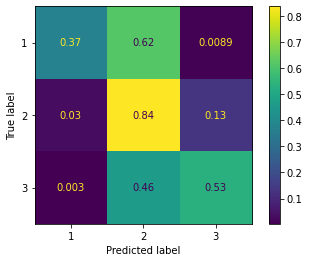

In [38]:
NN_cm = confusion_matrix(y_test, NN_reg_class, labels=[1,2,3], normalize='true')
NN_disp = ConfusionMatrixDisplay(confusion_matrix=NN_cm, display_labels=[1,2,3])
NN_disp.plot()
plt.show()

In [56]:
# 2.5 as threshold
i = 1
j_list = np.linspace(2,3,100)
best_i = 0
best_j = 0
best_ = 0
for j in j_list:
    i = 1
    while i <= j:
        NN_reg_class = []
        for num in NN_pred_1:
            if num >=j:
                NN_reg_class.append(3)
            elif num >=i and num <j:
                NN_reg_class.append(2)
            elif num <i:
                NN_reg_class.append(1)
        score_ = accuracy_score(y_test, NN_reg_class)
        if score_ >= best_:
            best_ = score_
            best_i = i
            best_j = j
        i += 0.01

In [57]:
print(best_i)
print(best_j)
print(best_)

1.5500000000000005
2.5353535353535355
0.6906621131597629


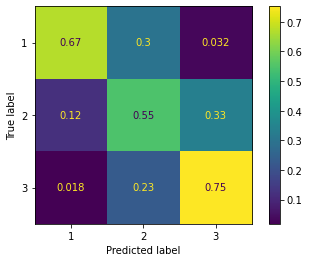

In [41]:
NN_cm = confusion_matrix(y_test, NN_reg_class, labels=[1,2,3], normalize='true')
NN_disp = ConfusionMatrixDisplay(confusion_matrix=NN_cm, display_labels=[1,2,3])
NN_disp.plot()
plt.show()

In [51]:
# PCA
pca_30 = PCA(n_components=len(train_set_combined.columns), random_state=43)
X_pca_30 = pca_30.fit_transform(train_set_combined)

In [54]:
for ix, char in enumerate(np.cumsum(pca_30.explained_variance_ratio_*100)):
    print(ix+1, char)

1 18.575395212148443
2 30.37856704038245
3 39.83963946963814
4 49.23575901058822
5 58.22658465393197
6 66.70634028235652
7 70.97754614279062
8 74.38895733463812
9 77.0965228954249
10 79.5040909697386
11 81.73195193278141
12 83.74546188093659
13 85.68080638793182
14 87.32127066726879
15 88.8398136175858
16 90.19203279341318
17 91.39706697793459
18 92.3009581372426
19 93.02791211721633
20 93.66339677824749
21 94.22667800992899
22 94.7428709475403
23 95.24660186113498
24 95.73121908473482
25 96.18322777265557
26 96.60162471159735
27 96.96760589220553
28 97.31364328346669
29 97.64839797070368
30 97.96356775965938
31 98.25455816104676
32 98.4953629836209
33 98.6791348412716
34 98.83547965073531
35 98.99066441223539
36 99.14343763291288
37 99.279043738133
38 99.40360292260674
39 99.50303590221031
40 99.60137183795469
41 99.67159739025597
42 99.73470635284237
43 99.79016641371626
44 99.84026106745705
45 99.88828589168126
46 99.91149795770252
47 99.9331199011575
48 99.94810154058997
49 99.9602

In [ ]:
PCA_6 = 

In [15]:
# XGBoosting
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
accuracy_score(xgb_pred, y_test)

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.728036683870225

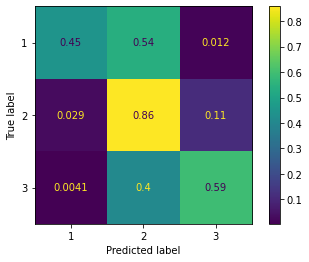

In [22]:
xgb_cm = confusion_matrix(y_test, xgb_pred, labels=xgb_clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

In [42]:
xgb_clf.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [88]:
# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(rf_pred, y_test)

<ipython-input-88-f89b27e642f0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.7106074365894527

In [23]:
# Catboost
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)
cat_pred = cat_clf.predict(X_test)
accuracy_score(y_test, cat_pred)

Learning rate set to 0.103895
0:	learn: 1.0439141	total: 203ms	remaining: 3m 22s
1:	learn: 0.9999004	total: 241ms	remaining: 2m
2:	learn: 0.9642695	total: 276ms	remaining: 1m 31s
3:	learn: 0.9338893	total: 311ms	remaining: 1m 17s
4:	learn: 0.9083782	total: 347ms	remaining: 1m 9s
5:	learn: 0.8852908	total: 383ms	remaining: 1m 3s
6:	learn: 0.8661365	total: 421ms	remaining: 59.7s
7:	learn: 0.8493280	total: 459ms	remaining: 56.9s
8:	learn: 0.8342253	total: 494ms	remaining: 54.3s
9:	learn: 0.8218712	total: 529ms	remaining: 52.4s
10:	learn: 0.8119675	total: 562ms	remaining: 50.6s
11:	learn: 0.8022543	total: 593ms	remaining: 48.8s
12:	learn: 0.7943056	total: 631ms	remaining: 47.9s
13:	learn: 0.7861388	total: 670ms	remaining: 47.2s
14:	learn: 0.7791283	total: 708ms	remaining: 46.5s
15:	learn: 0.7725110	total: 756ms	remaining: 46.5s
16:	learn: 0.7666882	total: 794ms	remaining: 45.9s
17:	learn: 0.7622664	total: 830ms	remaining: 45.3s
18:	learn: 0.7577317	total: 873ms	remaining: 45.1s
19:	learn: 

166:	learn: 0.6671171	total: 6.19s	remaining: 30.9s
167:	learn: 0.6669781	total: 6.22s	remaining: 30.8s
168:	learn: 0.6668049	total: 6.25s	remaining: 30.7s
169:	learn: 0.6666879	total: 6.28s	remaining: 30.7s
170:	learn: 0.6665050	total: 6.32s	remaining: 30.6s
171:	learn: 0.6663074	total: 6.36s	remaining: 30.6s
172:	learn: 0.6661451	total: 6.41s	remaining: 30.6s
173:	learn: 0.6658673	total: 6.46s	remaining: 30.6s
174:	learn: 0.6656379	total: 6.5s	remaining: 30.6s
175:	learn: 0.6654110	total: 6.53s	remaining: 30.6s
176:	learn: 0.6651891	total: 6.57s	remaining: 30.5s
177:	learn: 0.6650160	total: 6.6s	remaining: 30.5s
178:	learn: 0.6645861	total: 6.64s	remaining: 30.5s
179:	learn: 0.6644460	total: 6.68s	remaining: 30.4s
180:	learn: 0.6643027	total: 6.71s	remaining: 30.4s
181:	learn: 0.6641195	total: 6.74s	remaining: 30.3s
182:	learn: 0.6638423	total: 6.77s	remaining: 30.2s
183:	learn: 0.6637246	total: 6.81s	remaining: 30.2s
184:	learn: 0.6634893	total: 6.84s	remaining: 30.1s
185:	learn: 0.

327:	learn: 0.6420164	total: 11.9s	remaining: 24.5s
328:	learn: 0.6418936	total: 12s	remaining: 24.4s
329:	learn: 0.6417721	total: 12s	remaining: 24.4s
330:	learn: 0.6416905	total: 12.1s	remaining: 24.4s
331:	learn: 0.6415156	total: 12.1s	remaining: 24.3s
332:	learn: 0.6414363	total: 12.1s	remaining: 24.3s
333:	learn: 0.6413664	total: 12.2s	remaining: 24.3s
334:	learn: 0.6412767	total: 12.2s	remaining: 24.2s
335:	learn: 0.6410628	total: 12.2s	remaining: 24.2s
336:	learn: 0.6409104	total: 12.3s	remaining: 24.1s
337:	learn: 0.6406521	total: 12.3s	remaining: 24.1s
338:	learn: 0.6405814	total: 12.3s	remaining: 24.1s
339:	learn: 0.6403975	total: 12.4s	remaining: 24s
340:	learn: 0.6403121	total: 12.4s	remaining: 24s
341:	learn: 0.6402233	total: 12.5s	remaining: 24s
342:	learn: 0.6400783	total: 12.5s	remaining: 23.9s
343:	learn: 0.6400001	total: 12.5s	remaining: 23.9s
344:	learn: 0.6398936	total: 12.6s	remaining: 23.8s
345:	learn: 0.6398490	total: 12.6s	remaining: 23.8s
346:	learn: 0.6397585	

486:	learn: 0.6266380	total: 17.6s	remaining: 18.6s
487:	learn: 0.6264981	total: 17.7s	remaining: 18.5s
488:	learn: 0.6264213	total: 17.7s	remaining: 18.5s
489:	learn: 0.6263740	total: 17.7s	remaining: 18.5s
490:	learn: 0.6262915	total: 17.8s	remaining: 18.4s
491:	learn: 0.6262000	total: 17.8s	remaining: 18.4s
492:	learn: 0.6261597	total: 17.8s	remaining: 18.4s
493:	learn: 0.6259848	total: 17.9s	remaining: 18.3s
494:	learn: 0.6258879	total: 17.9s	remaining: 18.3s
495:	learn: 0.6258348	total: 18s	remaining: 18.3s
496:	learn: 0.6257962	total: 18s	remaining: 18.2s
497:	learn: 0.6257008	total: 18s	remaining: 18.2s
498:	learn: 0.6256559	total: 18.1s	remaining: 18.1s
499:	learn: 0.6255248	total: 18.1s	remaining: 18.1s
500:	learn: 0.6254803	total: 18.1s	remaining: 18.1s
501:	learn: 0.6254165	total: 18.2s	remaining: 18s
502:	learn: 0.6253341	total: 18.2s	remaining: 18s
503:	learn: 0.6251967	total: 18.2s	remaining: 17.9s
504:	learn: 0.6251285	total: 18.3s	remaining: 17.9s
505:	learn: 0.6249547	

649:	learn: 0.6148034	total: 23.4s	remaining: 12.6s
650:	learn: 0.6147266	total: 23.4s	remaining: 12.6s
651:	learn: 0.6146611	total: 23.5s	remaining: 12.5s
652:	learn: 0.6146225	total: 23.5s	remaining: 12.5s
653:	learn: 0.6145349	total: 23.5s	remaining: 12.4s
654:	learn: 0.6145122	total: 23.6s	remaining: 12.4s
655:	learn: 0.6144506	total: 23.6s	remaining: 12.4s
656:	learn: 0.6143952	total: 23.6s	remaining: 12.3s
657:	learn: 0.6143380	total: 23.7s	remaining: 12.3s
658:	learn: 0.6142445	total: 23.7s	remaining: 12.3s
659:	learn: 0.6141514	total: 23.7s	remaining: 12.2s
660:	learn: 0.6141120	total: 23.8s	remaining: 12.2s
661:	learn: 0.6140848	total: 23.8s	remaining: 12.2s
662:	learn: 0.6140408	total: 23.8s	remaining: 12.1s
663:	learn: 0.6139503	total: 23.9s	remaining: 12.1s
664:	learn: 0.6138607	total: 23.9s	remaining: 12s
665:	learn: 0.6138154	total: 23.9s	remaining: 12s
666:	learn: 0.6137841	total: 24s	remaining: 12s
667:	learn: 0.6137044	total: 24s	remaining: 11.9s
668:	learn: 0.6135820	

809:	learn: 0.6057346	total: 29s	remaining: 6.8s
810:	learn: 0.6057028	total: 29s	remaining: 6.76s
811:	learn: 0.6056692	total: 29.1s	remaining: 6.73s
812:	learn: 0.6056246	total: 29.1s	remaining: 6.69s
813:	learn: 0.6055774	total: 29.1s	remaining: 6.66s
814:	learn: 0.6055228	total: 29.2s	remaining: 6.62s
815:	learn: 0.6054914	total: 29.2s	remaining: 6.58s
816:	learn: 0.6054493	total: 29.2s	remaining: 6.55s
817:	learn: 0.6053934	total: 29.3s	remaining: 6.51s
818:	learn: 0.6053250	total: 29.3s	remaining: 6.47s
819:	learn: 0.6052644	total: 29.3s	remaining: 6.44s
820:	learn: 0.6052205	total: 29.4s	remaining: 6.4s
821:	learn: 0.6051368	total: 29.4s	remaining: 6.37s
822:	learn: 0.6050669	total: 29.4s	remaining: 6.33s
823:	learn: 0.6050326	total: 29.5s	remaining: 6.3s
824:	learn: 0.6049960	total: 29.5s	remaining: 6.26s
825:	learn: 0.6049535	total: 29.5s	remaining: 6.22s
826:	learn: 0.6048767	total: 29.6s	remaining: 6.19s
827:	learn: 0.6048488	total: 29.6s	remaining: 6.15s
828:	learn: 0.60479

973:	learn: 0.5973253	total: 34.8s	remaining: 929ms
974:	learn: 0.5972880	total: 34.8s	remaining: 893ms
975:	learn: 0.5972441	total: 34.9s	remaining: 857ms
976:	learn: 0.5971523	total: 34.9s	remaining: 822ms
977:	learn: 0.5970734	total: 34.9s	remaining: 786ms
978:	learn: 0.5970316	total: 35s	remaining: 750ms
979:	learn: 0.5969831	total: 35s	remaining: 715ms
980:	learn: 0.5969459	total: 35s	remaining: 679ms
981:	learn: 0.5969041	total: 35.1s	remaining: 643ms
982:	learn: 0.5968268	total: 35.1s	remaining: 607ms
983:	learn: 0.5967871	total: 35.2s	remaining: 572ms
984:	learn: 0.5967436	total: 35.2s	remaining: 536ms
985:	learn: 0.5967154	total: 35.2s	remaining: 500ms
986:	learn: 0.5966706	total: 35.3s	remaining: 464ms
987:	learn: 0.5966458	total: 35.3s	remaining: 429ms
988:	learn: 0.5965966	total: 35.3s	remaining: 393ms
989:	learn: 0.5965566	total: 35.4s	remaining: 357ms
990:	learn: 0.5965092	total: 35.4s	remaining: 321ms
991:	learn: 0.5964613	total: 35.4s	remaining: 286ms
992:	learn: 0.5964

0.7237006197118244

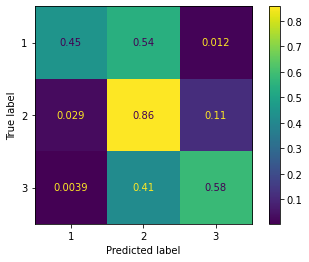

In [24]:
cat_cm = confusion_matrix(y_test, cat_pred, labels=cat_clf.classes_, normalize='true')
cat_disp = ConfusionMatrixDisplay(confusion_matrix=cat_cm, display_labels=cat_clf.classes_)
cat_disp.plot()
plt.show()

In [44]:
cat_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'class_names': [1, 2, 3],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'MultiClass',
 'learning_rate': 0.10389500111341476,
 'score

In [56]:
# PCA - continued
pca_6 = PCA(n_components =6, random_state=42)
X_pca_6 = pca_6.fit_transform(train_set_combined)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_6,train_label, test_size=0.2, random_state=42)

In [57]:
# PCA - logistic
log_param = {
    'multi_class': ['multinomial'],
    'solver': ['lbfgs', 'liblinear', 'sag']
}

log_clf_pca= GridSearchCV(LogisticRegression(), log_param)
log_clf_pca.fit(X_train_pca, y_train_pca)
log_pred_pca = log_clf_pca.predict(X_test_pca)
accuracy_score(y_test_pca, log_pred_pca)

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

0.5646668329464132

In [62]:
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train_pca)
lin_pred_pca = lin_reg_pca.predict(X_test_pca)

lin_reg_class_pca = []
for num in lin_pred_pca:
    if num >=2.5:
        lin_reg_class_pca.append(3)
    elif num >=1.5 and num <2.5:
        lin_reg_class_pca.append(2)
    elif num <1.5:
        lin_reg_class_pca.append(1)

accuracy_score(lin_reg_class_pca, y_test)

0.5615011223882888

In [65]:
# Neural Network
NN_clf_2 = keras.Sequential([keras.layers.Flatten(),
                keras.layers.Dense(6,activation = tf.nn.sigmoid),
                keras.layers.Dense(6,activation = tf.nn.relu),
                keras.layers.Dense(6,activation = tf.nn.tanh),
                keras.layers.Dense(6,activation = tf.nn.relu),
                keras.layers.Dense(4,activation = tf.nn.sigmoid),
                keras.layers.Dense(4,activation = tf.nn.relu),
                keras.layers.Dense(3,activation = tf.nn.softmax)])
NN_clf_2.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

NN_clf_2.fit(X_train_pca, y_train_pca,epochs = 50)

Epoch 1/50
6515/6515 [==============================] - 6s 686us/step - loss: 0.9740 - accuracy: 0.5666
Epoch 2/50
6515/6515 [==============================] - 4s 684us/step - loss: 0.8305 - accuracy: 0.5757
Epoch 3/50
6515/6515 [==============================] - 4s 681us/step - loss: 0.8262 - accuracy: 0.5774
Epoch 4/50
6515/6515 [==============================] - 4s 685us/step - loss: 0.8219 - accuracy: 0.5773
Epoch 5/50
6515/6515 [==============================] - 4s 687us/step - loss: 0.8169 - accuracy: 0.5799
Epoch 6/50
6515/6515 [==============================] - 4s 681us/step - loss: 0.8035 - accuracy: 0.6133
Epoch 7/50
6515/6515 [==============================] - 5s 694us/step - loss: 0.7856 - accuracy: 0.6260
Epoch 8/50
6515/6515 [==============================] - 4s 681us/step - loss: 0.7829 - accuracy: 0.6306
Epoch 9/50
6515/6515 [==============================] - 4s 681us/step - loss: 0.7802 - accuracy: 0.6332
Epoch 10/50
6515/6515 [==============================] - 4s 682u

In [67]:
NN_clf_2.evaluate(X_test_pca, y_test_pca, verbose=0)

[0.7616063952445984, 0.6319141983985901]